In [97]:
import pandas as pd  # data processing, CSV file I/O
dom = pd.read_csv("Domestic_Violence_Calls_from_2020_to_Present.csv")
cov = pd.read_csv("LA_County_COVID_Cases.csv")


from sklearn.preprocessing import MinMaxScaler
import plotly.express as px 
import cufflinks as cf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
cf.go_offline()
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [98]:
dom.info()
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62064 entries, 0 to 62063
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           62064 non-null  int64  
 1   Date Rptd       62064 non-null  object 
 2   DATE OCC        62064 non-null  object 
 3   TIME OCC        62064 non-null  int64  
 4   AREA            62064 non-null  int64  
 5   AREA NAME       62064 non-null  object 
 6   Rpt Dist No     62064 non-null  int64  
 7   Part 1-2        62064 non-null  int64  
 8   Crm Cd          62064 non-null  int64  
 9   Crm Cd Desc     62064 non-null  object 
 10  Mocodes         62064 non-null  object 
 11  Vict Age        62064 non-null  int64  
 12  Vict Sex        62041 non-null  object 
 13  Vict Descent    62040 non-null  object 
 14  Premis Cd       62064 non-null  int64  
 15  Premis Desc     62062 non-null  object 
 16  Weapon Used Cd  56141 non-null  float64
 17  Weapon Desc     56141 non-null 

In [100]:
df=dom.loc[:,['DATE OCC','Crm Cd','Crm Cd Desc','Mocodes','Vict Sex','Vict Descent','Premis Cd','Premis Desc']]

df.loc['DATE OCC']=dom.loc[dom['DATE OCC'].str.contains('2020' , regex=True), 'DATE OCC'] = '2020'
df.loc['DATE OCC']=dom.loc[dom['DATE OCC'].str.contains('2021' , regex=True), 'DATE OCC'] = '2021'
df.loc['DATE OCC']=dom.loc[dom['DATE OCC'].str.contains('2022' , regex=True), 'DATE OCC'] = '2022'
df.loc['DATE OCC']=dom.loc[dom['DATE OCC'].str.contains('2023' , regex=True), 'DATE OCC'] = '2023'


In [101]:
df['DATE OCC']

0           2020
1           2020
2           2020
3           2020
4           2020
            ... 
62060       2023
62061       2023
62062       2023
62063       2023
DATE OCC    2023
Name: DATE OCC, Length: 62065, dtype: object

In [102]:

dv=[236,250,251,761,926,626,627,647,763,928,930]
for x in df.index:
    if df.loc[x,'Crm Cd'] in dv:
        df.loc[x,'DV']='Yes'
    else:
        df.loc[x,'DV']='No'


#Question 1

In [103]:
g1=df[df['DV']=='Yes']
g1=g1.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.line(g1, x='Crm Cd Desc', y='Count', color='Vict Sex',animation_frame="DATE OCC",labels={'DATE OCC':'Year'}, animation_group="Count",title="Cases of Domestic Violation")
fig['layout']['sliders'][0]['pad']=dict(l=10,r= 10, t= 150)
fig.update_layout(hovermode="x unified")
fig.show()

g2=df[df['DV']=='No']
g2=g2.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()

fig = px.line(g2, x='Crm Cd Desc', y='Count', color='Vict Sex',animation_frame="DATE OCC", labels={'DATE OCC':'Year'},animation_group="Count",title="Other Cases")
fig['layout']['sliders'][0]['pad']=dict(l=10,r= 10, t= 250)
fig.update_layout(hovermode="x unified")
fig.show()


In [104]:
fig = px.line(g1, x='DATE OCC', y='Count', facet_col='Crm Cd Desc',
             facet_col_wrap=2, labels={'DATE OCC':'Year'}, title='Domestic Violence Over the years')
fig.update_layout(hovermode="x unified")
fig.show()

#Question 2

In [105]:
g3=df.loc[df['Premis Cd']==501 ]
g3 = g3[g3['Mocodes'].str.contains('1814')]

print(g3)

      DATE OCC Crm Cd                                     Crm Cd Desc  \
0         2020    626               INTIMATE PARTNER - SIMPLE ASSAULT   
1         2020    626               INTIMATE PARTNER - SIMPLE ASSAULT   
6         2020    236           INTIMATE PARTNER - AGGRAVATED ASSAULT   
11        2020    210                                         ROBBERY   
21        2020    901                  VIOLATION OF RESTRAINING ORDER   
...        ...    ...                                             ...   
62027     2023    626               INTIMATE PARTNER - SIMPLE ASSAULT   
62031     2023    626               INTIMATE PARTNER - SIMPLE ASSAULT   
62032     2023    230  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
62035     2023    956         LETTERS, LEWD  -  TELEPHONE CALLS, LEWD   
62057     2023    626               INTIMATE PARTNER - SIMPLE ASSAULT   

                                            Mocodes Vict Sex Vict Descent  \
0                                    2000 1814

In [107]:
g3=df.loc[df['Premis Cd']==501 ]
g3 = g3[g3['Mocodes'].str.contains('1814')]
g3=g3.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.bar(g3, x='Crm Cd Desc', y='Count', color='Vict Sex',animation_frame="DATE OCC",labels={'DATE OCC':'Year'}, animation_group="Count",title="Single Family Dwelling Cases with Boyfriend/Girlfriend as Prime Suspect")
fig['layout']['sliders'][0]['pad']=dict(l=10,r= 10, t= 250)
fig.update_layout(hovermode="x unified")
fig.show()

In [109]:
g3=df.loc[df['Premis Cd']==501 ]
g3 = g3[g3['Mocodes'].str.contains('1814')]
g3=g3.groupby(['DATE OCC','Crm Cd Desc','Vict Descent']).size().to_frame(name="Count").reset_index()
fig = px.bar(g3, x='Crm Cd Desc', y='Count', color='Vict Descent',animation_frame="DATE OCC",labels={'DATE OCC':'Year'}, animation_group="Count",title="Single Family Dwelling Cases with Boyfriend/Girlfriend as Prime Suspect with respect to ethnicity")
fig['layout']['sliders'][0]['pad']=dict(l=10,r= 10, t= 250)
fig.update_layout(hovermode="x unified")
fig.show()

In [110]:
g4=df.loc[df['Premis Cd']==502]
g4=g4[g4['Mocodes'].str.contains('1814')]
g4=g4.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.bar(g4, x='Crm Cd Desc', y='Count', color='Vict Sex',labels={'DATE OCC':'Year'},animation_frame="DATE OCC", animation_group="Count",title="Multi-Unit Family Dwelling Cases with Boyfriend/Girlfriend as Prime Suspect")
fig['layout']['sliders'][0]['pad']=dict(l=10,r= 10, t= 250)
fig.update_layout(hovermode="x unified")
fig.show()

In [112]:
g4=df.loc[df['Premis Cd']==502] 
g4=g4[g4['Mocodes'].str.contains('1814',regex=True)]
g4=g4.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.line(g4, x='Crm Cd Desc', y='Count', color='Vict Sex',animation_frame="DATE OCC",labels={'DATE OCC':'Year'}, animation_group="Count",title="Multi-Unit Family Dwelling Cases with Boyfriend/Girlfriend as Prime Suspect")
fig['layout']['sliders'][0]['pad']=dict(l=10,r= 10, t= 250)
fig.update_layout(hovermode="x unified")
fig.show()

In [118]:
g4=df.loc[df['Premis Cd']==101]
g4=g4[g4['Mocodes'].str.contains('1814',regex=True)]
g4=g4.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.line(g4, x='Crm Cd Desc', y='Count', color='Vict Sex',labels={'DATE OCC':'Year'},animation_frame="DATE OCC", animation_group="Count",title="Street Cases with Boyfriend/Girlfriend as Prime Suspect")
fig['layout']['sliders'][0]['pad']=dict(l=10,r= 10, t= 250)
fig.update_layout(hovermode="x unified")
fig.show()

In [116]:

g4=df[df['Mocodes'].str.contains('1903',regex=True)]
g4=g4.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.line(g4, x='Crm Cd Desc', y='Count', color='Vict Sex',labels={'DATE OCC':'Year'},animation_frame="DATE OCC", animation_group="Count",title="Crimes which involved CyberStalking")
fig.show()

In [119]:
g=df.loc[(df['Crm Cd']==121) | (df['Crm Cd']==122) | (df['Crm Cd']==815) | (df['Crm Cd']==820) | (df['Crm Cd']==821)]
print(g)

      DATE OCC Crm Cd                                        Crm Cd Desc  \
35        2020    121                                     RAPE, FORCIBLE   
271       2020    121                                     RAPE, FORCIBLE   
425       2020    121                                     RAPE, FORCIBLE   
578       2020    121                                     RAPE, FORCIBLE   
599       2020    121                                     RAPE, FORCIBLE   
...        ...    ...                                                ...   
61682     2023    815                SEXUAL PENETRATION W/FOREIGN OBJECT   
61744     2023    821  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...   
61772     2023    121                                     RAPE, FORCIBLE   
61885     2023    121                                     RAPE, FORCIBLE   
61954     2023    820                                    ORAL COPULATION   

                                                 Mocodes Vict Sex  \
35                

In [120]:
g=df.loc[(df['Crm Cd']==121) | (df['Crm Cd']==122) | (df['Crm Cd']==815) | (df['Crm Cd']==820) | (df['Crm Cd']==821)]
g5=g.groupby(['DATE OCC','Crm Cd Desc']).size().to_frame(name="Count").reset_index()
fig = px.line(g5, x='DATE OCC', y='Count', color='Crm Cd Desc',labels={'DATE OCC':'Year'},title="Violent Crimes : Rape")
fig.show()

In [121]:
for x in g.index:
    if '1814' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Boyfriend'
    elif '1813' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Spouse'
    elif '1812' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Foster-Parent'
    elif '1813' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Co-worker'
    else:
        g.loc[x,'Suspect']='Others'


In [122]:
print(g)

      DATE OCC Crm Cd                                        Crm Cd Desc  \
35        2020    121                                     RAPE, FORCIBLE   
271       2020    121                                     RAPE, FORCIBLE   
425       2020    121                                     RAPE, FORCIBLE   
578       2020    121                                     RAPE, FORCIBLE   
599       2020    121                                     RAPE, FORCIBLE   
...        ...    ...                                                ...   
61682     2023    815                SEXUAL PENETRATION W/FOREIGN OBJECT   
61744     2023    821  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...   
61772     2023    121                                     RAPE, FORCIBLE   
61885     2023    121                                     RAPE, FORCIBLE   
61954     2023    820                                    ORAL COPULATION   

                                                 Mocodes Vict Sex  \
35                

In [123]:
g7=g.groupby(['DATE OCC','Crm Cd Desc','Suspect']).size().to_frame(name="Count").reset_index()
fig = px.line(g7, x='Crm Cd Desc', y='Count', color='Suspect',animation_frame="DATE OCC", animation_group="Count",title="Rape Cases with Prime Suspects")
fig.show()

In [124]:
g=df.loc[(df['Crm Cd']==110) | (df['Crm Cd']==113)]
g6=g.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.bar(g6, x="Crm Cd Desc", y="Count", color="Vict Sex", barmode="group",facet_col="DATE OCC",title="Violent Crimes : Homicide")
fig.show()

In [125]:
for x in g.index:
    if '1814' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Boyfriend'
    elif '1813' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Spouse'
    elif '1812' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Foster-Parent'
    elif '1813' in g.loc[x,'Mocodes']:
        g.loc[x,'Suspect']='Co-worker'
    else:
        g.loc[x,'Suspect']='Others'
    


In [126]:
g8=g.groupby(['DATE OCC','Crm Cd Desc','Suspect']).size().to_frame(name="Count").reset_index()
fig=go.Figure(data=[go.Pie(
             values = g8['Count'],
             labels = g8['Suspect'],
             hole = 0.6,
             title='Homicide Cases with Prime Suspects')])
fig.show()

In [127]:
g=df.loc[(df['Crm Cd']==235) | (df['Crm Cd']==627)]
g9=g.groupby(['DATE OCC','Crm Cd Desc','Vict Sex']).size().to_frame(name="Count").reset_index()
fig = px.bar(g9, x="Crm Cd Desc", y="Count", color="Vict Sex", barmode="group",facet_col="DATE OCC",title="Child Abuse Cases")
fig.show()

In [128]:
g=df.loc[(df['Crm Cd']==235) | (df['Crm Cd']==627)]
g9=g.groupby(['DATE OCC','Crm Cd Desc','Vict Descent']).size().to_frame(name="Count").reset_index()
fig = px.bar(g9, x="Crm Cd Desc", y="Count", color="Vict Descent", barmode="group",facet_col="DATE OCC",labels={'DATE OCC':'Year'},title="Child Abuse Cases with respect to ethnicity")
fig.show()

In [129]:
cov = pd.read_csv("LA_County_COVID_Cases.csv")
cov['date'] = pd.to_datetime(cov['date'])

cov['month'] = cov['date'].dt.to_period('M')
d2 = cov[(cov['date'].dt.year >= 2020) & (cov['date'].dt.year <= 2023)]
monthly = d2.groupby('month')[['new_state_cases', 'new_state_deaths']].sum().reset_index()

print(monthly)

      month  new_state_cases  new_state_deaths
0   2020-03             8160               188
1   2020-04            43580              1997
2   2020-05            67097              2156
3   2020-06           138393              1896
4   2020-07           270941              3298
5   2020-08           200184              3995
6   2020-09           102593              2516
7   2020-10           120893              1670
8   2020-11           374163              1999
9   2020-12          1159835              7250
10  2021-01           892414             16100
11  2021-02           204635             10702
12  2021-03            89306              5592
13  2021-04            72707              2228
14  2021-05            44549              1199
15  2021-06            26792               765
16  2021-07           182866               970
17  2021-08           347690              1315
18  2021-09            48740               604
19  2021-10           -20957                 2
20  2021-11  

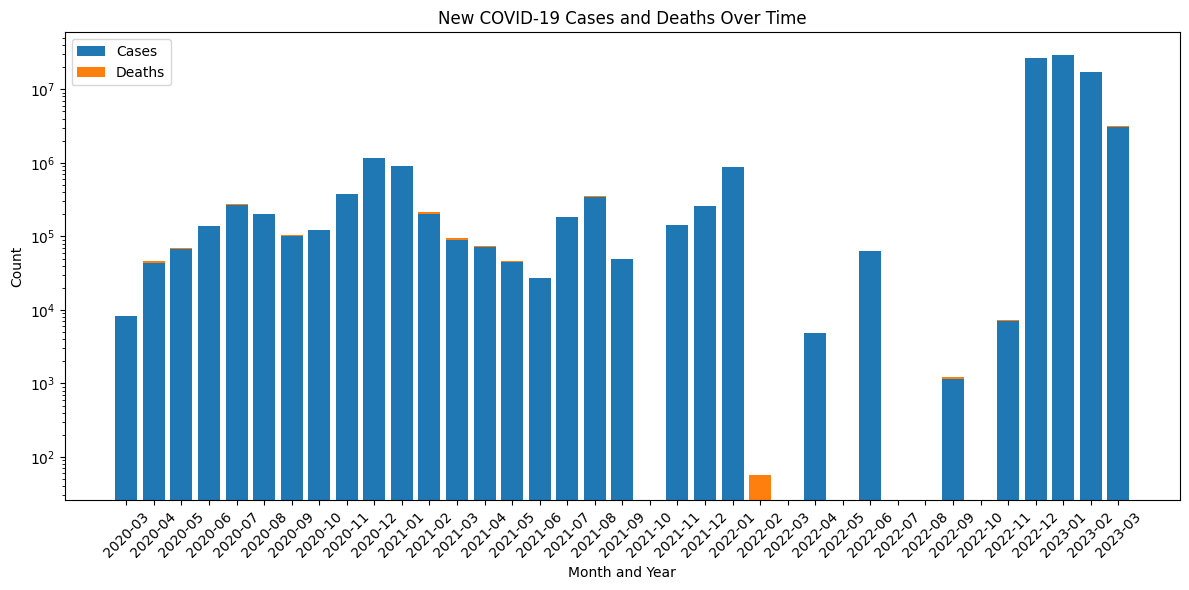

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(monthly['month'].astype(str), monthly['new_state_cases'], label='Cases')
plt.bar(monthly['month'].astype(str), monthly['new_state_deaths'], bottom=monthly['new_state_cases'], label='Deaths')
plt.xlabel('Month and Year')
plt.ylabel('Count')
plt.title('New COVID-19 Cases and Deaths Over Time')
plt.xticks(rotation=45)
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.legend()
plt.tight_layout()
plt.show()

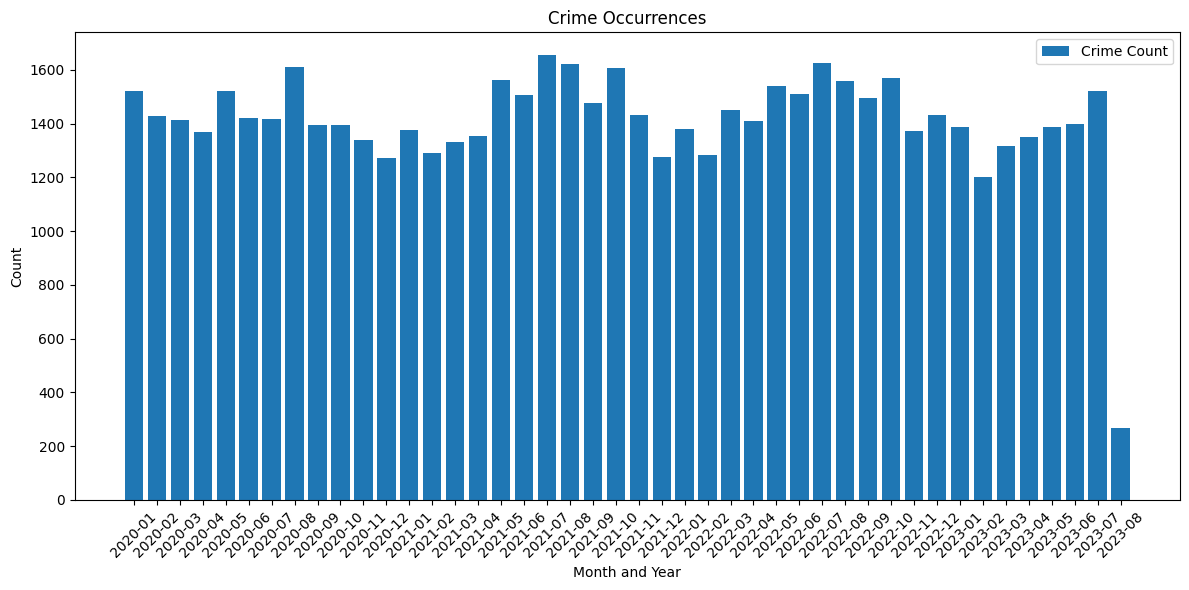

In [132]:
dom = pd.read_csv("Domestic_Violence_Calls_from_2020_to_Present.csv")
dom['DATE OCC'] = pd.to_datetime(dom['DATE OCC'])

dom['month'] = dom['DATE OCC'].dt.to_period('M')
d2 = dom[(dom['DATE OCC'].dt.year >= 2020) & (dom['DATE OCC'].dt.year <= 2023)]
monthly = d2.groupby('month')['DATE OCC'].size().to_frame(name='Count').reset_index()
plt.figure(figsize=(12, 6))
plt.bar(monthly['month'].astype(str), monthly['Count'], label='Crime Count')
plt.xlabel('Month and Year')
plt.ylabel('Count')
plt.title('Crime Occurrences')
plt.xticks(rotation=45)
 
plt.legend()
plt.tight_layout()
plt.show()

#Question 1

One first glance covid 19 cases and crime occurrences do not have anything in common. but when compared with rape cases certain conclusions can be made.